### 1. Import Library 

In [8]:
import os 
import shutil
import cv2 
import matplotlib.pyplot as plt 
import pandas as ps 
import numpy as np 
import pandas as pd 

import glob 
import xml.etree.ElementTree as ET

### 2. Make dir for save data

In [5]:
train_dir = '../Yolov3/data/train/'
label_dir ="../Yolov3/data/train/label"
image_dir ="../Yolov3/data/train/image"

In [5]:

os.makedirs(label_dir,exist_ok = True)
os.makedirs(image_dir,exist_ok = True)  


In [10]:
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        shutil.move(os.path.join(train_dir,file), label_dir)      
    else:
        shutil.move(os.path.join(train_dir,file), image_dir)      

In [142]:
dataframe_label = { 
    'name': [],
    'label': [],
    'w': [],
    'h':[], 
    'xmin' : [], 
    'ymin' : [],
    'xmax' : [], 
    'ymax' : []
}

### 3. Read file XML

In [143]:
for idx,anno in enumerate(glob.glob(label_dir + '/*.xml')):
    tree = ET.parse(anno) 

    root = tree.getroot() 
    width , height = [] , [] 
    for item in root.iter():
        if item.tag == 'size':
            for i in list(item):
                if i.tag == 'width':
                    width = int(round(float(i.text)))
                if i.tag == 'height':
                    height = int(round(float(i.text)))
        if item.tag == 'object': 
            for i in list(item):
                if i.tag =='name':
                    label = i.text
                    dataframe_label['label'] += [label]
                    dataframe_label['w'] += [width]
                    dataframe_label['h'] += [height] 
                    dataframe_label['name'] += [anno.split('/')[-1][:-4]]
                if i.tag == 'bndbox': 
                    for j in i:
                        if j.tag == 'xmin':
                            xmin = int(round(float(j.text)))
                            dataframe_label['xmin'] += [xmin]
                        if j.tag == 'xmax':
                            xmax = int(round(float(j.text)))
                            dataframe_label['xmax'] += [xmax]
                        if j.tag == 'ymin':
                            ymin = int(round(float(j.text)))
                            dataframe_label['ymin'] += [ymin]
                        if j.tag == 'ymax':
                            ymax = int(round(float(j.text)))
                            dataframe_label['ymax'] += [ymax]
                        

     

In [144]:
dataframe_label = pd.DataFrame(dataframe_label)

In [145]:
dataframe_label

,name,label,w,h,xmin,ymin,xmax,ymax
0,banana_11,banana,300,300,69,43,218,258
1,orange_12,orange,640,336,159,45,520,336
2,orange_52,orange,500,500,215,181,406,370
3,orange_52,orange,500,500,328,173,488,351
4,apple_61,apple,500,500,234,132,416,343
...,...,...,...,...,...,...,...,...
459,mixed_10,banana,800,533,379,157,643,485
460,mixed_10,banana,800,533,390,38,544,415
461,mixed_4,orange,640,857,313,153,478,348
462,mixed_4,apple,640,857,127,148,320,371


In [146]:
dataframe_label['label'].unique()

array(['banana', 'orange', 'apple'], dtype=object)

In [147]:
label = {
    'banana': 0,
    'orange' : 1,
    'apple' : 2
}


In [148]:
dataframe_label['label'] = dataframe_label['label'].map(label)

In [149]:
dataframe_label = dataframe_label.drop_duplicates(['name','label','w','h','xmin','ymin','xmax','ymax'])

         name  label  width  height  xmin  ymin  xmax  ymax
68  orange_49      1   1300    1390   261   278   864   889


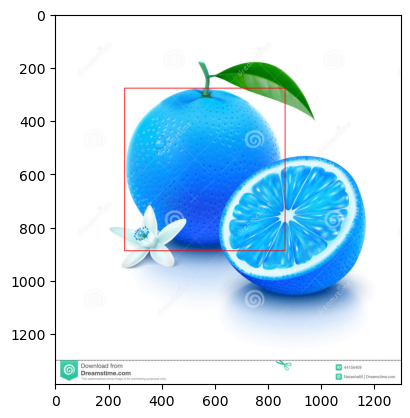

         name  label  width  height  xmin  ymin  xmax  ymax
59  orange_42      1      0       0   102    99  1969  1919


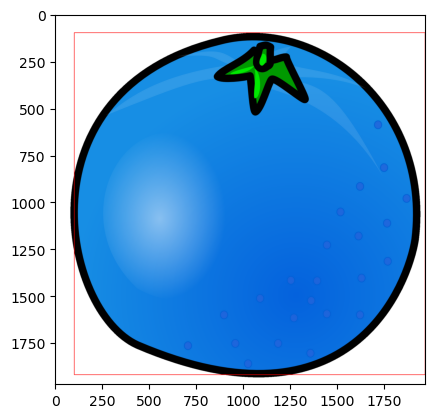

        name  label  width  height  xmin  ymin  xmax  ymax
0  banana_11      0    300     300    69    43   218   258


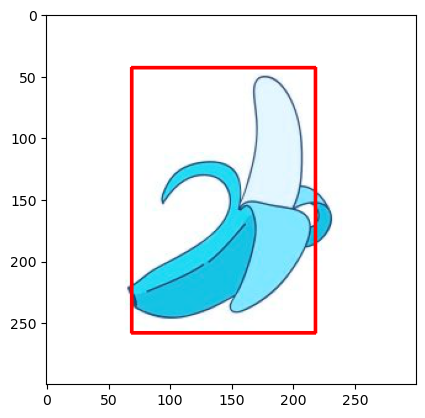

        name  label  width  height  xmin  ymin  xmax  ymax
211  apple_7      2   1300    1332   287   233  1141  1111


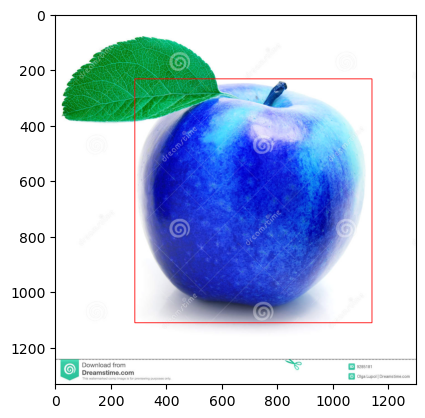

          name  label  width  height  xmin  ymin  xmax  ymax
216  banana_38      0    600     500    38   174   595   408


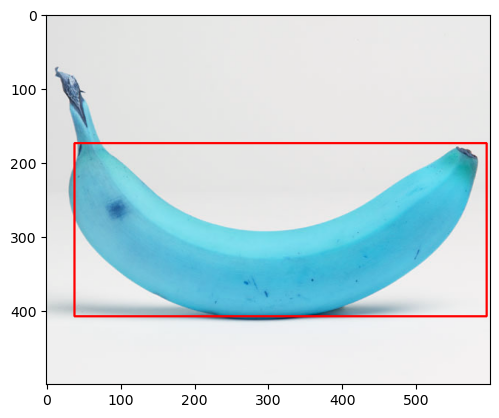

         name  label  width  height  xmin  ymin  xmax  ymax
138  orange_9      1    500     427    35    96   268   315


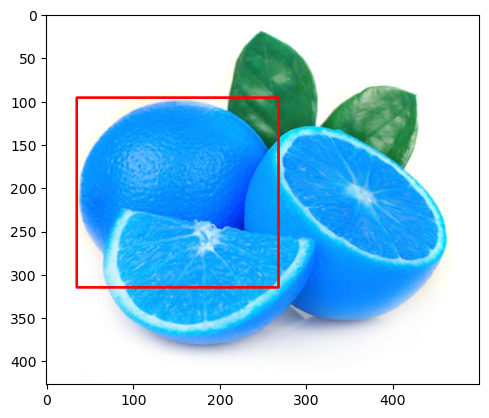

In [16]:
for idx,image in enumerate(os.listdir(image_dir)): 
    
    sample = cv2.imread(os.path.join(image_dir,image))
    label = dataframe_label[dataframe_label['name'] == image[:-4]]
    for i,row in label.iterrows():
        xmin = row['xmin']
        ymin = row['ymin']
        xmax = row['xmax']
        ymax = row['ymax']
        image = cv2.rectangle(sample, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

# Vẽ bounding box trên hình ảnh mẫu
    print(label)
    plt.imshow(image)
    plt.show()
    if idx == 5:
        break

### Resize image to (416,416)

In [19]:
for filename in os.listdir(image_dir):
    img_path = os.path.join(image_dir, filename)
    if os.path.isfile(img_path):
        img = cv2.imread(img_path)
        resized_img = cv2.resize(img, (416,416))
        cv2.imwrite(img_path, resized_img)

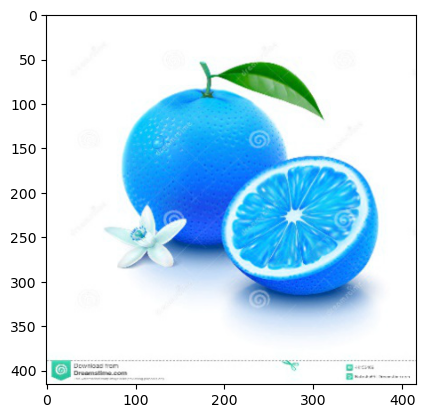

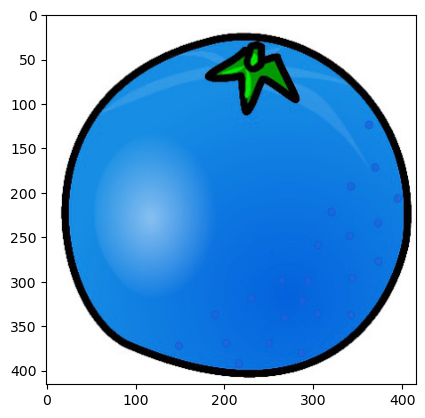

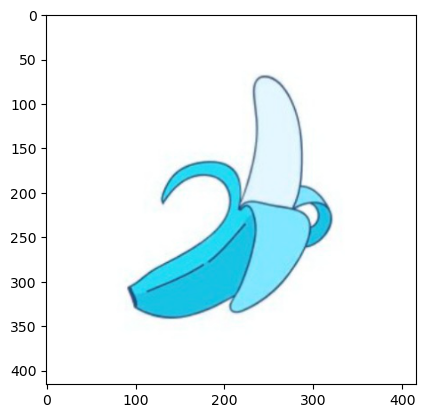

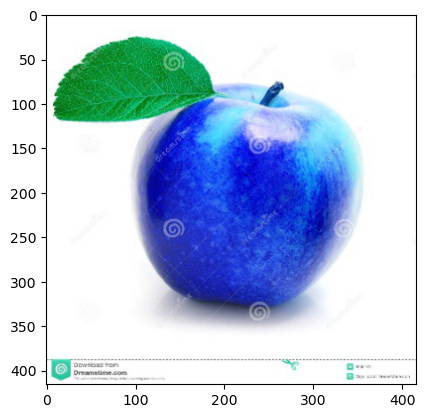

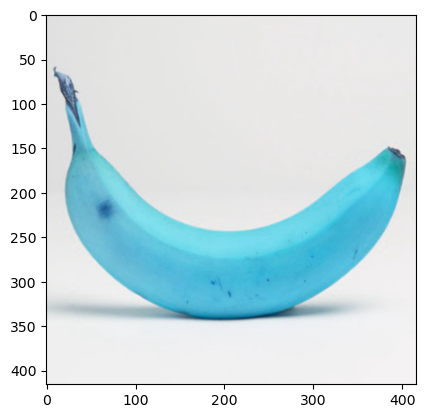

In [20]:
for idx ,filename in enumerate(os.listdir(image_dir)):
    img_path = os.path.join(image_dir, filename) 
    image = cv2.imread(img_path) 
    plt.imshow(image)
    plt.show() 
    if idx == 4:
        break

### Convert xmin,ymin,xmax,ymax to size(416,416)

In [150]:
dataframe_label['xmin'] = (416/dataframe_label['w'] * dataframe_label['xmin'])
dataframe_label['xmax'] = (416/dataframe_label['w'] * dataframe_label['xmax'])
dataframe_label['ymin'] = (416/dataframe_label['h'] * dataframe_label['ymin'])
dataframe_label['ymax'] = (416/dataframe_label['h'] * dataframe_label['ymax']) 

In [151]:
dataframe_label.replace([np.inf, -np.inf], np.nan, inplace=True)
dataframe_label.dropna(inplace=True)
dataframe_label

,name,label,w,h,xmin,ymin,xmax,ymax
0,banana_11,0,300,300,95.680,59.626667,302.293333,357.760000
1,orange_12,1,640,336,103.350,55.714286,338.000000,416.000000
2,orange_52,1,500,500,178.880,150.592000,337.792000,307.840000
3,orange_52,1,500,500,272.896,143.936000,406.016000,292.032000
4,apple_61,2,500,500,194.688,109.824000,346.112000,285.376000
...,...,...,...,...,...,...,...,...
459,mixed_10,0,800,533,197.080,122.536585,334.360000,378.536585
460,mixed_10,0,800,533,202.800,29.658537,282.880000,323.902439
461,mixed_4,1,640,857,203.450,74.268378,310.700000,168.924154
462,mixed_4,2,640,857,82.550,71.841307,208.000000,180.088681


In [152]:
dataframe_label[['xmin', 'ymin', 'xmax', 'ymax']] = dataframe_label[['xmin', 'ymin', 'xmax', 'ymax']].astype('int')


         name  label     w     h  xmin  ymin  xmax  ymax
68  orange_49      1  1300  1390    83    83   276   266


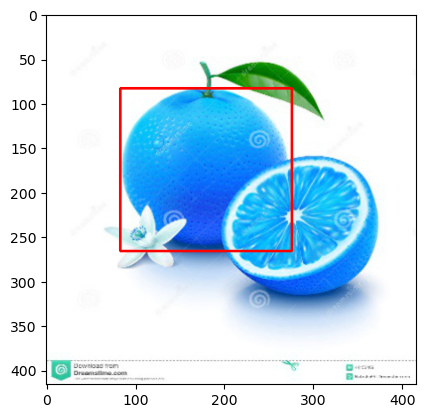

        name  label    w    h  xmin  ymin  xmax  ymax
0  banana_11      0  300  300    95    59   302   357


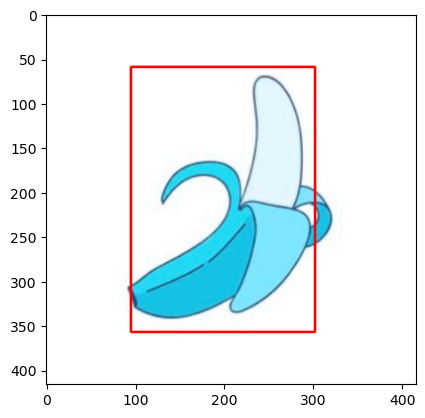

        name  label     w     h  xmin  ymin  xmax  ymax
211  apple_7      2  1300  1332    91    72   365   346


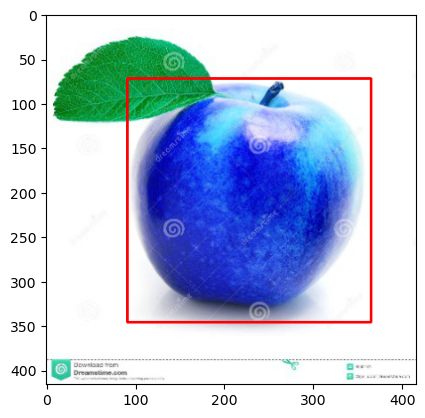

          name  label    w    h  xmin  ymin  xmax  ymax
216  banana_38      0  600  500    26   144   412   339


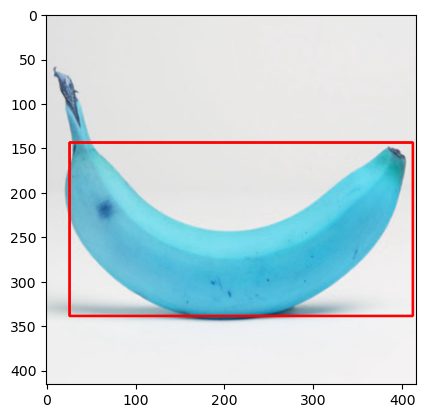

         name  label    w    h  xmin  ymin  xmax  ymax
138  orange_9      1  500  427    29    93   222   306


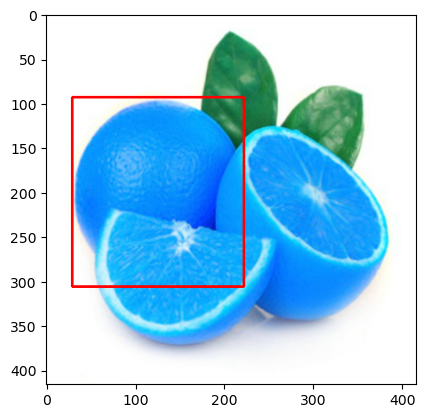

In [153]:
for idx,image in enumerate(os.listdir(image_dir)): 
    
    sample = cv2.imread(os.path.join(image_dir,image))

    label = dataframe_label[dataframe_label['name'] == image[:-4]]
    if len(label) == 0:
        continue
    for i,row in label.iterrows():
        xmin = row['xmin']
        ymin = row['ymin']
        xmax = row['xmax']
        ymax = row['ymax']
        image = cv2.rectangle(sample, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    print(label)
    plt.imshow(image)
    plt.show()
    if idx == 5:
        break

### Calculator x, y, width, height 

In [154]:
dataframe_label['x'] = (dataframe_label['xmin']+dataframe_label['xmax'])/(2*416)
dataframe_label['y'] = (dataframe_label['ymin']+dataframe_label['ymax'])/(2*416)
dataframe_label['width'] = (dataframe_label['xmax']-dataframe_label['xmin'])/ 416
dataframe_label['height'] = (dataframe_label['ymax']-dataframe_label['ymin'])/ 416

In [155]:
dataframe_label

,name,label,w,h,xmin,ymin,xmax,ymax,x,y,width,height
0,banana_11,0,300,300,95,59,302,357,0.477163,0.500000,0.497596,0.716346
1,orange_12,1,640,336,103,55,338,416,0.530048,0.566106,0.564904,0.867788
2,orange_52,1,500,500,178,150,337,307,0.618990,0.549279,0.382212,0.377404
3,orange_52,1,500,500,272,143,406,292,0.814904,0.522837,0.322115,0.358173
4,apple_61,2,500,500,194,109,346,285,0.649038,0.473558,0.365385,0.423077
...,...,...,...,...,...,...,...,...,...,...,...,...
459,mixed_10,0,800,533,197,122,334,378,0.638221,0.600962,0.329327,0.615385
460,mixed_10,0,800,533,202,29,282,323,0.581731,0.423077,0.192308,0.706731
461,mixed_4,1,640,857,203,74,310,168,0.616587,0.290865,0.257212,0.225962
462,mixed_4,2,640,857,82,71,208,180,0.348558,0.301683,0.302885,0.262019


### Save to csv 

In [228]:
dataframe_label.to_csv('../Yolov3/data/train/label.csv')

In [1]:
import torch 

In [2]:
ANCHORS = [ 
    [(0.28, 0.22), (0.38, 0.48), (0.9, 0.78)], 
    [(0.07, 0.15), (0.15, 0.11), (0.14, 0.29)], 
    [(0.02, 0.03), (0.04, 0.07), (0.08, 0.06)], 
] 

In [3]:
scaled_anchors = ( 
    torch.tensor(ANCHORS) * 
    torch.tensor(s).unsqueeze(1).unsqueeze(1).repeat(1,3,2) 
)

NameError: name 's' is not defined